<a href="https://colab.research.google.com/github/VondracekS/ESF_Workshop_BestCodingPractices/blob/main/best_coding_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best Coding Practices Workshop
17.3.2023 @ ESF Muni

## Git + Shell

1. Which directory are you in?
2. List all files within the current directory
3. Clone the git repository available under https://github.com/VondracekS/ESF_Workshop_BestCodingPractices
4. Search the directory and find the data
5. Unzip the data

Hints: 
- the needed commands are: *git clone, ls, cd, pwd, rm* (random order)
- shell commands must begin with the "!", however to use cd, you need %cd

In [1]:
# TODO: show the current directory
!pwd

/content


In [2]:
# TODO: list all folders/files within the directory
!ls

sample_data


In [3]:
# TODO: clone the git repository
!git clone https://github.com/VondracekS/ESF_Workshop_BestCodingPractices; ls

Cloning into 'ESF_Workshop_BestCodingPractices'...
remote: Enumerating objects: 394, done.
remote: Counting objects: 100% (394/394), done.
remote: Compressing objects: 100% (379/379), done.
remote: Total 394 (delta 10), reused 382 (delta 3), pack-reused 0
Receiving objects: 100% (394/394), 7.42 MiB | 19.59 MiB/s, done.
Resolving deltas: 100% (10/10), done.
ESF_Workshop_BestCodingPractices  sample_data


In [4]:
# Change the directory to the newly cloned one
%cd ESF_Workshop_BestCodingPractices/

/content/ESF_Workshop_BestCodingPractices


In [5]:
!ls

BCP_Workshop.pptx		     data
BestCodingPracices.nb.html	     ESF_Workshop_BestCodingPractices.Rproj
BestCodingPracices.Rmd		     README.md
best_coding_practices.ipynb	     utils
Copy_of_best_coding_practices.ipynb


In [6]:
%cd data

/content/ESF_Workshop_BestCodingPractices/data


In [7]:
ls

specdata/  specdata.zip


In [8]:
# unzip the data
! unzip specdata.zip

Archive:  specdata.zip
replace specdata/001.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: specdata/001.csv        
  inflating: specdata/002.csv        
  inflating: specdata/003.csv        
  inflating: specdata/004.csv        
  inflating: specdata/005.csv        
  inflating: specdata/006.csv        
  inflating: specdata/007.csv        
  inflating: specdata/008.csv        
  inflating: specdata/009.csv        
  inflating: specdata/010.csv        
  inflating: specdata/011.csv        
  inflating: specdata/012.csv        
  inflating: specdata/013.csv        
  inflating: specdata/014.csv        
  inflating: specdata/015.csv        
  inflating: specdata/016.csv        
  inflating: specdata/017.csv        
  inflating: specdata/018.csv        
  inflating: specdata/019.csv        
  inflating: specdata/020.csv        
  inflating: specdata/021.csv        
  inflating: specdata/022.csv        
  inflating: specdata/023.csv        
  inflating: specdata/024.csv        

In [10]:
# force removal of the original zip file
!rm -rf specdata.zip

## Python

In [11]:
import os
os.getcwd()

'/content/ESF_Workshop_BestCodingPractices/data'

In this section, you will be complete te following tasks:
- iteratively searching throgh a directory and subsequently loading data using os package
- testing of the loaded data
- using a modular design, you will separate functionalities into operation-specific functions


In [12]:
# TODO: Create a function that:
# - loads all the .csv files from the directory 
# - stores them in a dictionary;
# - add some explanatory docstring
#
# hints: os.listdir, string.split, make sure you read only csv files, 
# btw: is the function name the best possible one? change this eventually
import os
import pandas as pd

def read_csv(path: str) -> dict:
  """
  Some docstring would be nice, eh?
  """
  csv_dict = {}
  pass

In [13]:
def read_csv(path: str) -> dict:
  csv_dict = {}
  for file in os.listdir(path):
    prefix, suffix = file.split(".")
    if suffix == "csv":
      csv_dict[prefix] = pd.read_csv(os.path.join(path, file))
  return csv_dict

csv_all_dict = read_csv("./specdata/")
csv_all_dict.keys()

dict_keys(['183', '090', '327', '222', '332', '190', '308', '012', '205', '117', '108', '133', '211', '165', '134', '262', '166', '111', '196', '181', '248', '240', '187', '225', '096', '320', '084', '246', '024', '170', '298', '251', '148', '088', '173', '164', '153', '175', '136', '079', '264', '022', '289', '279', '037', '197', '309', '255', '313', '228', '245', '174', '304', '017', '023', '119', '077', '209', '123', '029', '267', '163', '104', '113', '043', '323', '276', '297', '053', '226', '296', '234', '082', '019', '150', '125', '046', '070', '102', '244', '033', '189', '243', '106', '144', '330', '215', '137', '068', '076', '083', '179', '127', '188', '091', '210', '272', '311', '229', '180', '011', '069', '010', '086', '171', '063', '103', '217', '050', '139', '066', '168', '092', '021', '042', '135', '081', '101', '198', '039', '204', '107', '093', '157', '259', '132', '006', '268', '027', '290', '147', '016', '207', '002', '130', '258', '009', '310', '301', '176', '054', '0

In [14]:
len(csv_all_dict.keys())

332

In [15]:
# TODO: call the exact previously defined function (you might have changed 
# the name) if you have changed it

def test_read_csv(path):
  dict_full = read_csv(path)
  assert len(dict_full) == len([f for f in os.listdir(path) if ".csv" in f])
  print(f"Tests passed for the test_read_csv({path})")

test_read_csv("./specdata/")

Tests passed for the test_read_csv(./specdata/)



OK, now you have the function. Howevr, some improvements are still possible.
PLease finish the following tasks:

- adjust the fuction to ignore the "0" padding for all numbers smaller than 100 (e.g. "050" will be replaced by "50" and so on) -> read_csv_v2()
- separate the padding removal to another function -> remove_padding()
- write a test for the padding removal
- use the remove_padding() function within the read_csv_v3
- extend the function to be able to specify only particular .csv files to be read (and if not specified, just load all) -> read_csv_v4()

Again, please find more suitable names for all the variables

In [ ]:
# TODO: ignore the padding within the function
# hint: did you know that "011" integer will be read as "11"?

def read_csv_v2(path: str) -> dict:
  csv_dict = {}
  pass

In [ ]:
# TODO: separating the padding removal function
def remove_padding(tgt_string: str) -> str:
  pass

In [ ]:
# TODO: write the test (e.g. for cases where should and should not be the 
# 0-padding removed)
def test_remove_padding(test_cases=[]) -> None:
  assert remove_padding(test_cases) == None
test_remove_padding()

In [ ]:
# TODO: adjust the former function so that you use the padding removal
def read_csv_v3(path: str) -> dict:
  pass

In [69]:
# TODO: Read only specific tables
def remove_padding(tgt_string: str) -> str:
    """
    Removes the padding from the file
    """
    str_out = str(int(tgt_string))
    return str_out

def read_csv_v4(path: str, id_list=None) -> dict:
    """
    Makes it possible to load only a subset of the data
    """
    csv_dict = {}
    files_listed = [f"{id.zfill(3)}.csv" for id in id_list]
    for file in os.listdir(path):
        prefix, suffix = file.split(".")
        if suffix == "csv":
            if id_list is None or file in files_listed:
                csv_dict[remove_padding(prefix)] = pd.read_csv(os.path.join(path, file))
    return csv_dict

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1
...,...,...,...,...
1456,2006-12-27,NaN,NaN,1
1457,2006-12-28,NaN,NaN,1
1458,2006-12-29,NaN,NaN,1
1459,2006-12-30,NaN,NaN,1


In [67]:
[f"{id.zfill(3)}.csv" for id in ["1", "5", "100"]]

['001.csv', '005.csv', '100.csv']

In the last part, create a new function, called get_monitor()
This function will do the following:
- load the specific monitoring stations
- concatenate all data frames from the dictionary
- if dropna, the function will drop all na values for all loaded tables
- if print_stats, the function will print descriptive stats for all the data frames
- if plot, the function will plot all variables in a single plot (
  i.e. Date will be on the x axis, concentration on the y axis, ID will be in the plot title

In [120]:
import seaborn as sns
def plot_monitoring_station(df, id_vars=['Date', 'ID'], value_vars=['sulfate', 'nitrate']):
  data_plotted = df.melt(id_vars=id_vars, value_vars=value_vars)
  g = sns.FacetGrid(data_plotted, col='ID', hue='variable', legend_out=True)
  g.map(sns.lineplot, 'Date', 'value')

In [121]:
# TODO: get_monitor function
# Hints: separate functionalities (loading the data and plotting the data)

def get_monitor(station_ids: list, dropna=True, print_stats=False, plot=True):
  stations_data = read_csv_v4("./specdata", station_ids)
  stations_data = pd.concat(stations_data.values())
  if dropna:
    stations_data = stations_data.dropna()
    if plot:
      plot_monitoring_station(stations_data)
  return stations_data

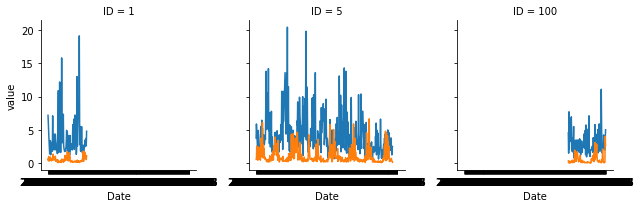

In [122]:
data = get_monitor(["1", "5", "100"])